M044_2024_12_04_09_30: VAF and Pairwise Correlation, all neurons

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal

from tools import dataTools as dt
from tools.dsp import preprocessing as prep
from tools import params
from tools.params import Params
from tools.decoding import decodeTools as decode
from sklearn.naive_bayes import GaussianNB
from tools.viz import dimensionality as dim

In [2]:
data_dir = "/Users/il620/Desktop/data/raw/"
session = "M044_2024_12_04_09_30"
# session = "M046_2024_12_18_16_00"

In [3]:
animal = session.split("_")[0]
data_dir = os.path.join(data_dir, animal)
data_dir = os.path.join(data_dir, session)
fname = os.path.join(data_dir, session+"_pyaldata.mat")

In [4]:
df = pyal.mat2dataframe(fname, shift_idx_fields=True)


field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


In [ ]:
df_ = prep.preprocess(df, only_trials=False, trial_selection_criteria = ["idx_trial_start>89999"])

/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 133)


In [ ]:
df_ = prep.preprocess(df,only_trials=True, trial_selection_criteria = ["idx_trial_start>89999"])

/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 133)


In [5]:
df_ = prep.preprocess(df,only_trials=False)

/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 20000)


In [6]:

df_["M1_rates"] = [df_["all_rates"][i][:,300:] for i in range(len(df_))]
df_["Dls_rates"] = [df_["all_rates"][i][:,0:300] for i in range(len(df_))]
df_ = pyal.merge_signals(df_, ["M1_rates","Dls_rates"], 'M1_Dls_rates')

/Users/il620/miniconda3/envs/earthq/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/Users/il620/miniconda3/envs/earthq/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


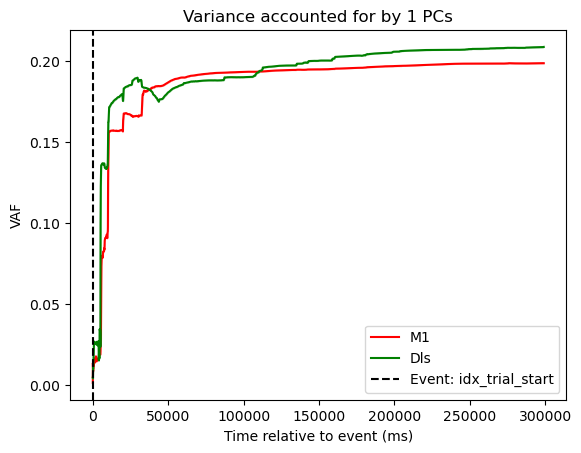

In [12]:
fig, ax = plt.subplots()
dim.plot_VAF_increasing_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_manifold = None, epoch_to_explain = None,idx_event="idx_trial_start", min_time=0, max_time=299,window_length = 30,step = 30, trial_query_data_to_explain=["trial_name=='free'","trial_id == 0"],trial_query_manifold =["trial_name=='free'","trial_id == 0"])

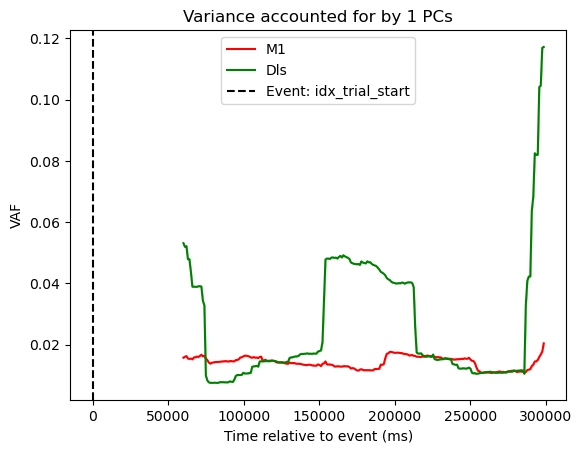

In [ ]:
fig, ax = plt.subplots()
dim.plot_VAF_in_moving_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_manifold = None, epoch_to_explain = Params.perturb_epoch,idx_event="idx_trial_start", min_time=0, max_time=299,window_length = 60,step = 1, trial_query_data_to_explain=["trial_name=='free'","trial_id > 0"],trial_query_manifold =["trial_name=='free'","trial_id == 0"])

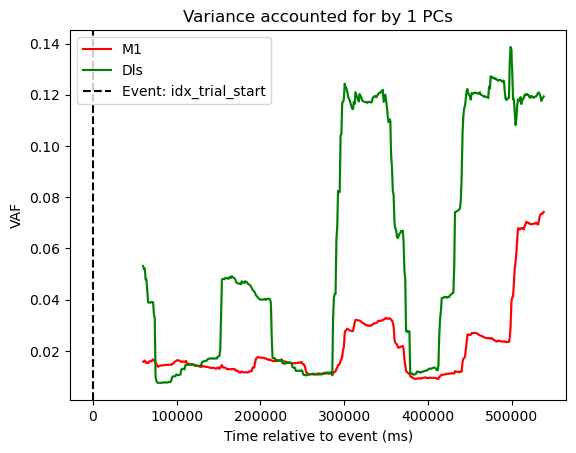

In [ ]:
fig, ax = plt.subplots()
dim.plot_VAF_in_moving_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_manifold = None, epoch_to_explain = Params.perturb_epoch,idx_event="idx_trial_start", min_time=0, max_time=539,window_length = 60,step = 1, trial_query_data_to_explain=["trial_name=='free'","trial_id > 0"],trial_query_manifold =["trial_name=='free'","trial_id == 0"])

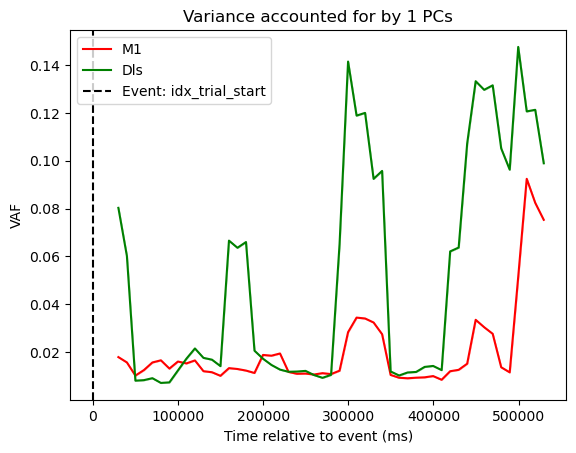

In [ ]:
fig, ax = plt.subplots()
dim.plot_VAF_in_moving_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_manifold = None, epoch_to_explain = Params.perturb_epoch,idx_event="idx_trial_start", min_time=0, max_time=539,window_length = 30,step = 10, trial_query_data_to_explain=["trial_name=='free'","trial_id > 0"],trial_query_manifold =["trial_name=='free'","trial_id == 0"])

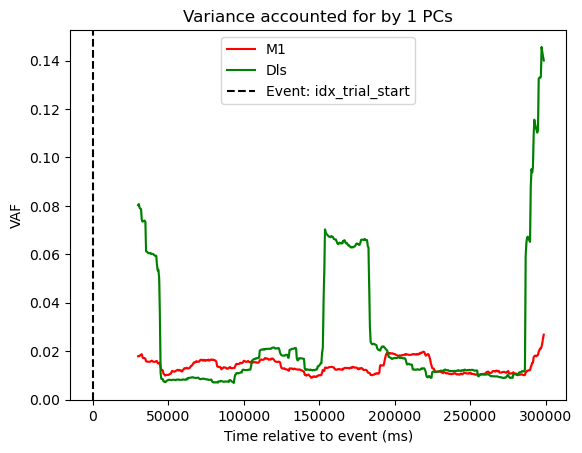

In [ ]:
fig, ax = plt.subplots()
dim.plot_VAF_in_moving_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_manifold = None, epoch_to_explain = Params.perturb_epoch,idx_event="idx_trial_start", min_time=0, max_time=299,window_length = 30,step = 0.5, trial_query_data_to_explain=["trial_name=='free'","trial_id > 0"],trial_query_manifold =["trial_name=='free'","trial_id == 0"])

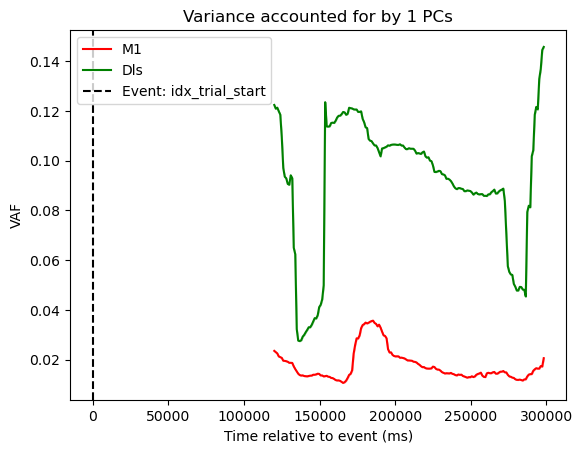

In [ ]:
fig, ax = plt.subplots()
dim.plot_VAF_by_moving_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_to_explain = Params.perturb_epoch,idx_event="idx_trial_start", min_time=0, max_time=299,window_length = 120,step = 1, trial_query_data_to_explain="trial_name=='trial'",trial_query_manifold ="trial_name=='free'")

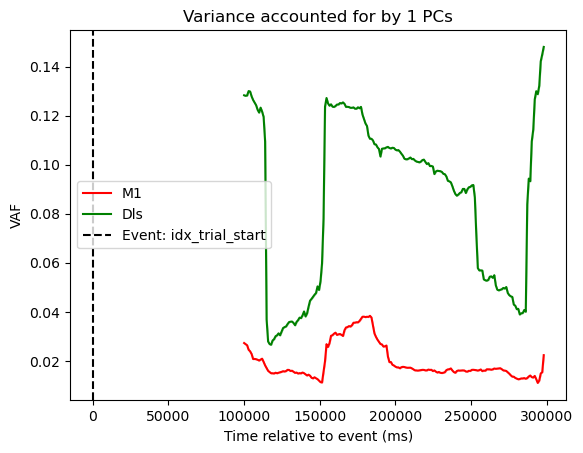

In [ ]:
fig, ax = plt.subplots()
dim.plot_VAF_by_moving_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_to_explain = Params.perturb_epoch,idx_event="idx_trial_start", min_time=0, max_time=299,window_length = 100,step = 1, trial_query_data_to_explain="trial_name=='trial'",trial_query_manifold ="trial_name=='free'")

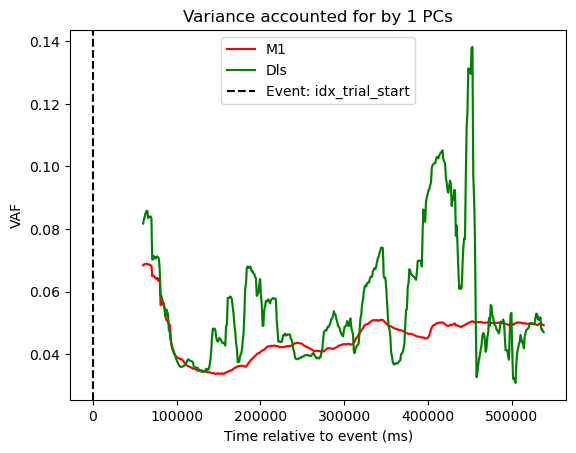

In [ ]:
fig, ax = plt.subplots()
dim.plot_VAF_by_moving_window(ax,[df_],["M1","Dls"],model = "pca",n_components = 1,epoch_to_explain = Params.perturb_epoch,idx_event="idx_trial_start", min_time=0, max_time=539,window_length = 60,step = 1, trial_query_data_to_explain=["trial_name=='trial'"],trial_query_manifold =["trial_name=='free'"])

In [ ]:
df.columns

Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'all_spikes'],
      dtype='object')

In [ ]:
{
    "imec0": {
        "SSp-ll": {
            "min": 256,  # Approx from 2 thirds up
            "max": 384
        },
        "Thal": {
            "min": 0,   # Approx bottom thirda
            "max": 128
        }
    },
    "imec1": {
        "CP": {
            "min": 0,   # Approx half and half
            "max": 200
        },
        "MOp": {
            "min": 210,
            "max": 384
        }
    }
}

In [ ]:
df

animal                session  trial_id  trial_name  trial_length  \
0      M044  M044_2024_12_04_09_30         0        free         60001   
1      M044  M044_2024_12_04_09_30         1  intertrial           101   
2      M044  M044_2024_12_04_09_30         2       trial           401   
3      M044  M044_2024_12_04_09_30         3  intertrial           101   
4      M044  M044_2024_12_04_09_30         4       trial           401   
...     ...                    ...       ...         ...           ...   
1064   M044  M044_2024_12_04_09_30      1064       trial           401   
1065   M044  M044_2024_12_04_09_30      1065  intertrial           501   
1066   M044  M044_2024_12_04_09_30      1066       trial           401   
1067   M044  M044_2024_12_04_09_30      1067  intertrial           301   
1068   M044  M044_2024_12_04_09_30      1068        free         54001   

      bin_size  idx_trial_start  idx_trial_end idx_CPI  \
0         0.01               -1          59999      []   
1         0.01            59999          60099      []   
2         0.01            60099          60499      []   
3         0.01            60499          60599      []   
4         0.01            60599          60999      []   
...        ...              ...            ...     ...   
1064      0.01           478399         478799      []   
1065      0.01           478799         479299      []   
1066      0.01           479299         479699      []   
1067      0.01           479699         479999      []   
1068      0.01           479999         533999      []   

     values_before_camera_trigger  ... idx_Sol_direction values_Sol_duration  \
0                             1.0  ...                []                  []   
1                              []  ...                99                  50   
2                              []  ...                -1                  50   
3                              []  ...                99                 100   
4                              []  ...                -1                 100   
...                           ...  ...               ...                 ...   
1064                           []  ...                -1                 100   
1065                           []  ...               499                 100   
1066                           []  ...                -1                 100   
1067                           []  ...                []                  []   
1068                           []  ...                []                  []   

     idx_Sol_duration idx_sol_on idx_earthquake_duration idx_session_timer  \
0                  []         []                      []                []   
1                  99         []                      []                []   
2                  -1        199                      []                []   
3                  99         []                      []                []   
4                  -1        199                      []                []   
...               ...        ...                     ...               ...   
1064               -1        199                      []                []   
1065              499         []                      []                []   
1066               -1        199                      []                []   
1067               []         []                     299                []   
1068               []         []                      -1             53999   

                                          all_chan_best  \
0     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
1     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
2     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
3     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
4     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
...                                                 ...   
1064  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
1065  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 

In [ ]:
area = "M1"
n_components = 30
epoch = Params.before_perturb_epoch
# epoch = None
model = "pca"
category = 'values_Sol_direction'
classifier = GaussianNB

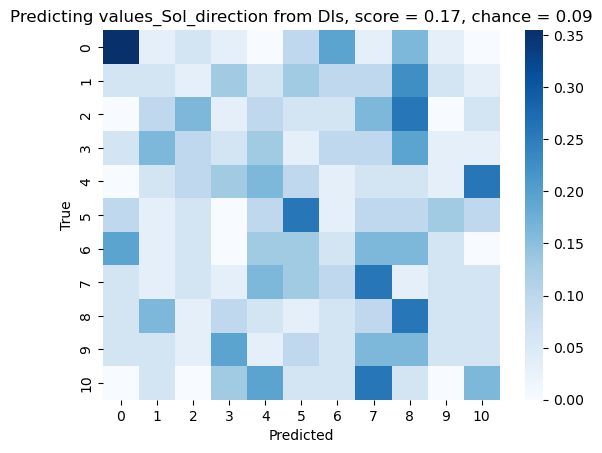

In [ ]:
#  percentage of class that was predicted correctly
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_], area = area, n_components = n_components, epoch = epoch, model = model)

In [ ]:
within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = epoch, model = model)

In [ ]:
within_results

{'M044_2024_12_04_09_30': 0.16994884910485933}

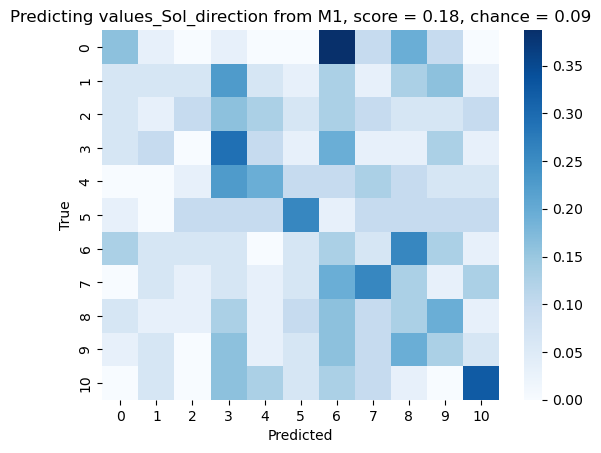

In [ ]:
#  percentage of class that was predicted correctly
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_], area = area, n_components = n_components, epoch = epoch, model = model)

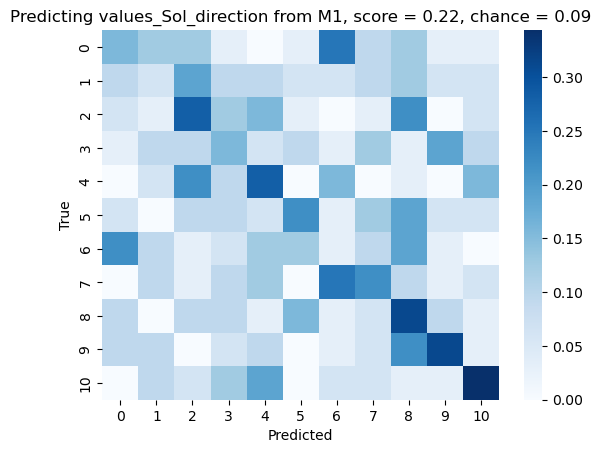

In [ ]:
#  percentage of class that was predicted correctly
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_], area = area, n_components = n_components, epoch = epoch, model = model)

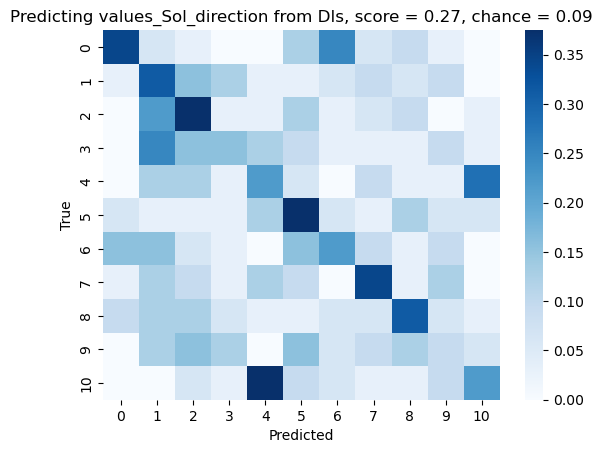

In [ ]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_], area = "Dls", n_components = n_components, epoch = epoch, model = model)

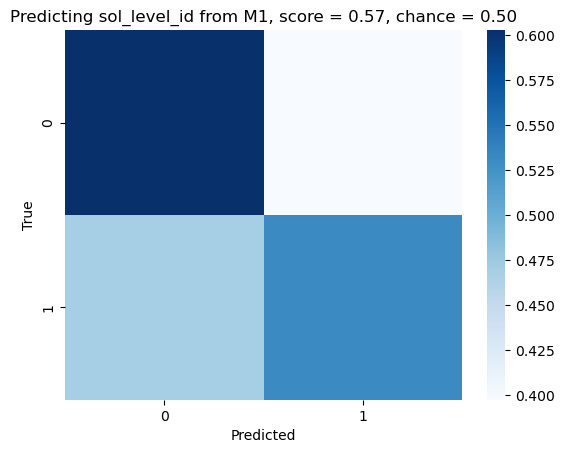

In [ ]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "sol_level_id", ax = ax,  allDFs = [df_], area = "M1", n_components = 25, epoch = Params.perturb_epoch, model = "pca")

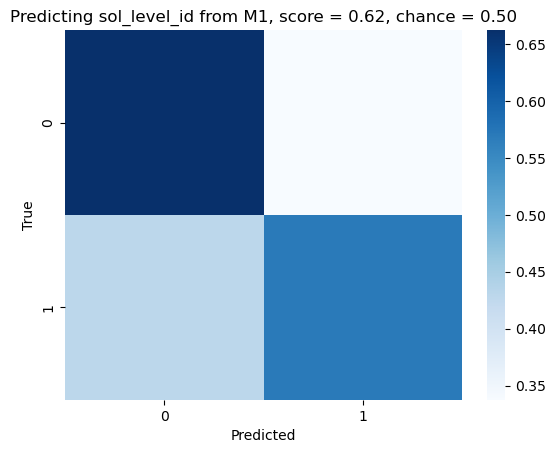

In [ ]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "sol_level_id", ax = ax,  allDFs = [df_], area = "M1", n_components = n_components, epoch = epoch, model = model)

(4, 71, 17, 30)


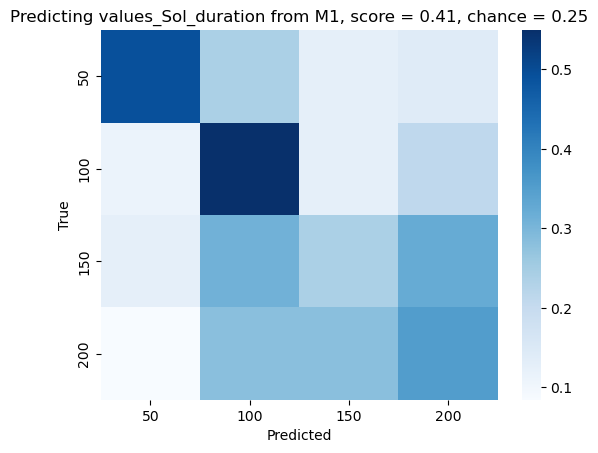

In [ ]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "values_Sol_duration", ax = ax,  allDFs = [df_], area = "M1", n_components = n_components, epoch = epoch, model = model)

(4, 71, 17, 30)


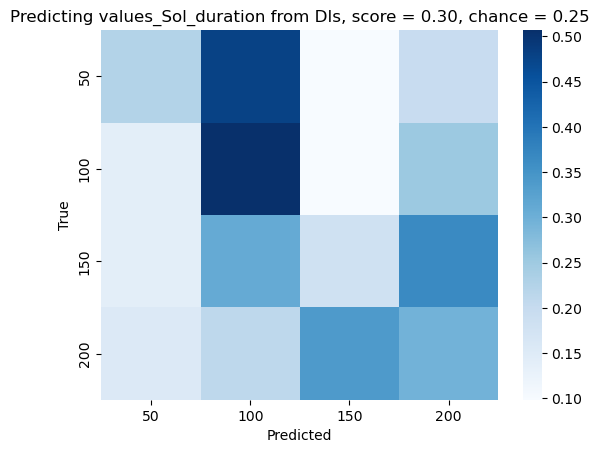

In [ ]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "values_Sol_duration", ax = ax,  allDFs = [df_], area = "Dls", n_components = n_components, epoch = epoch, model = model)

In [ ]:
areas = ["Dls", "M1"]
n_components = 30
model = "pca"
category = 'sol_level_id'
classifier = GaussianNB
idx_event = 'idx_sol_on'
min_time = 0
max_time = 2

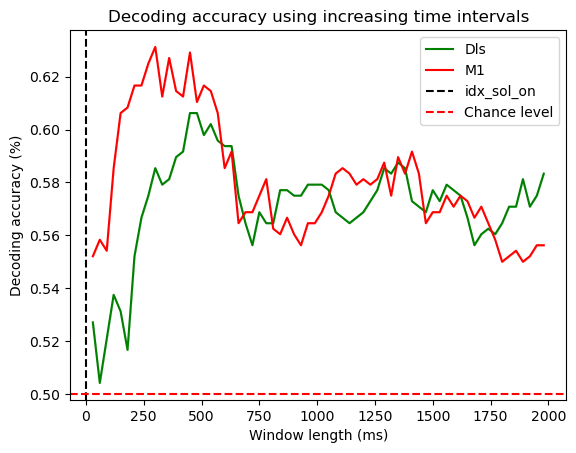

In [ ]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = category, df_list = [df_], areas = areas, n_components = n_components, model = model)

In [ ]:
areas = ["Dls", "M1"]
n_components = 30
model = "pca"
category = 'values_Sol_direction'
classifier = GaussianNB
idx_event = 'idx_sol_on'
min_time = 0
max_time = 2

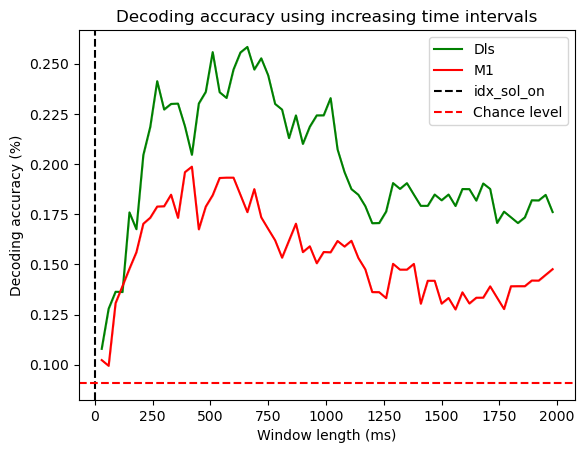

In [ ]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = category, df_list = [df_], areas = areas, n_components = n_components, model = model)

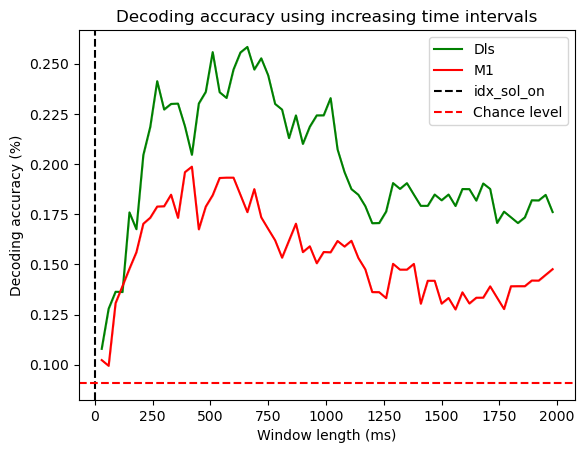

In [ ]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = category, df_list = [df_], areas = areas, n_components = n_components, model = model)

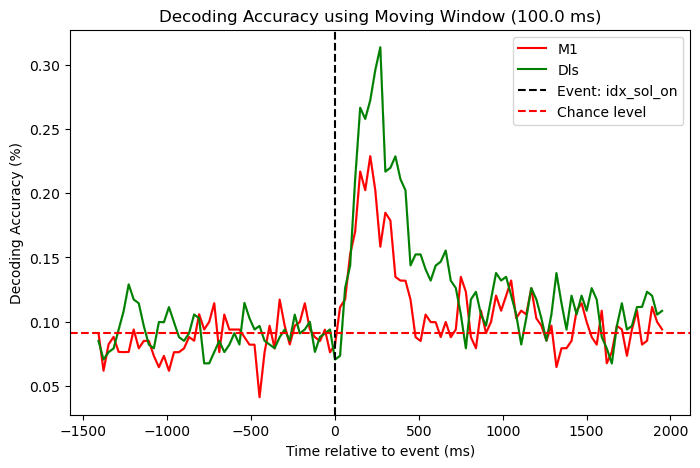

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

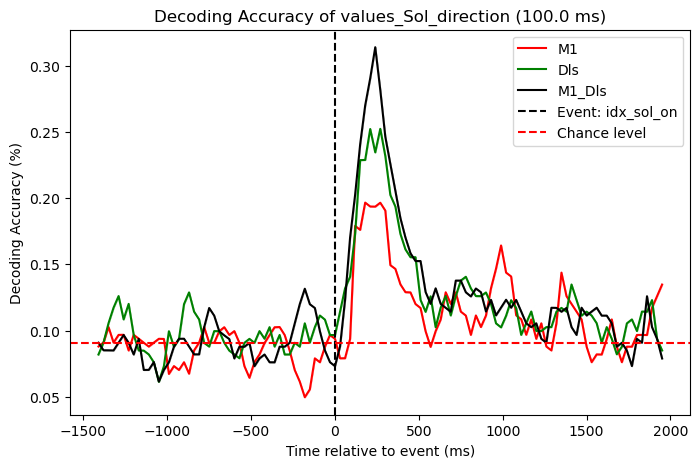

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls","M1_Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

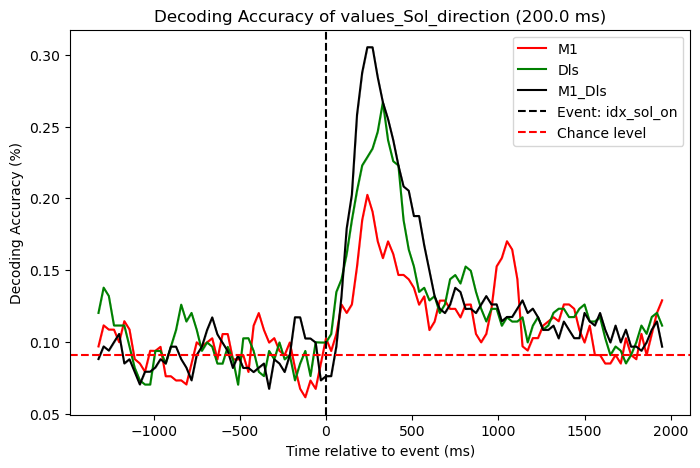

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls","M1_Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.2, step=0.03, trial_conditions=[]
)

plt.show()

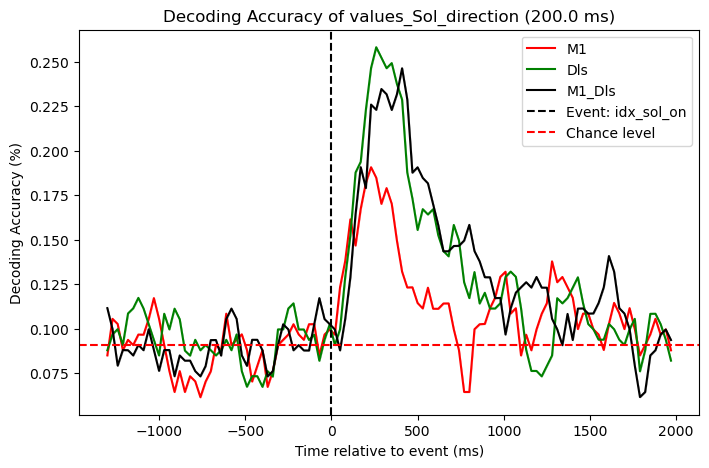

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls","M1_Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.2, step=0.03, trial_conditions=[]
)

plt.show()

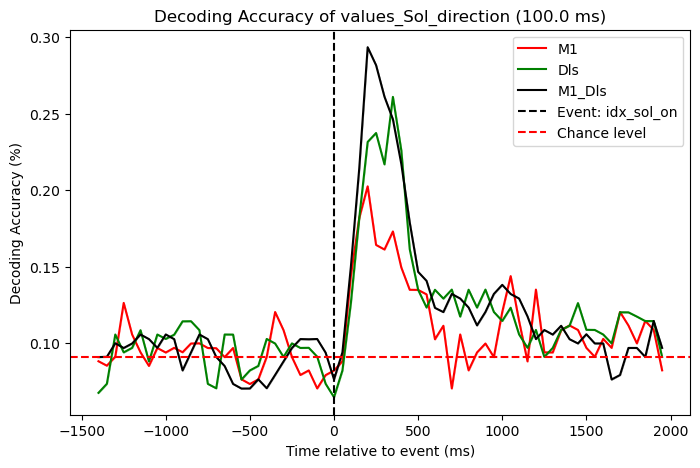

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls","M1_Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

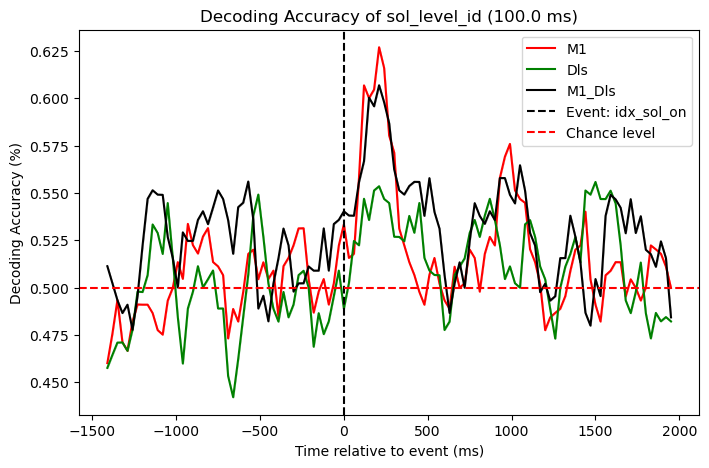

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="sol_level_id", df_list=[df_], 
    areas=["M1", "Dls","M1_Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

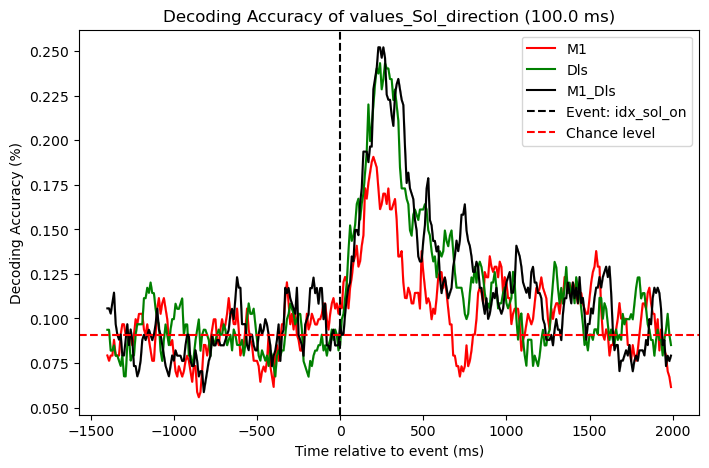

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls","M1_Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.01, trial_conditions=[]
)

plt.show()

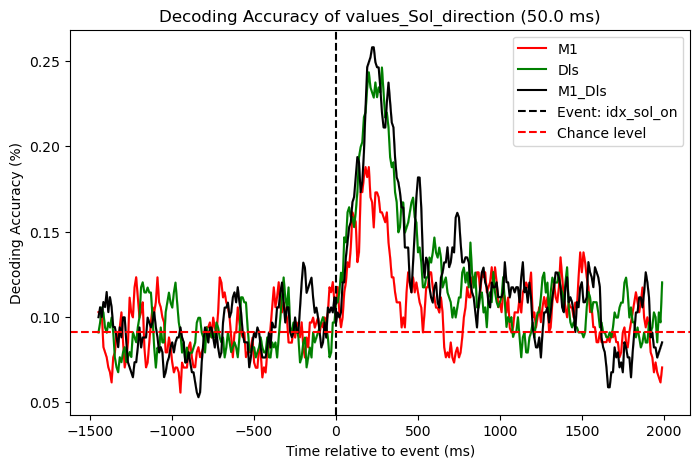

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls","M1_Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.05, step=0.01, trial_conditions=[]
)

plt.show()

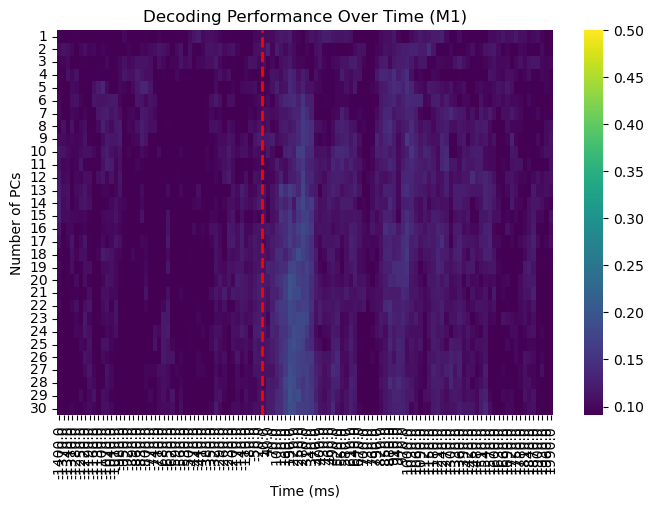

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    area="M1", max_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

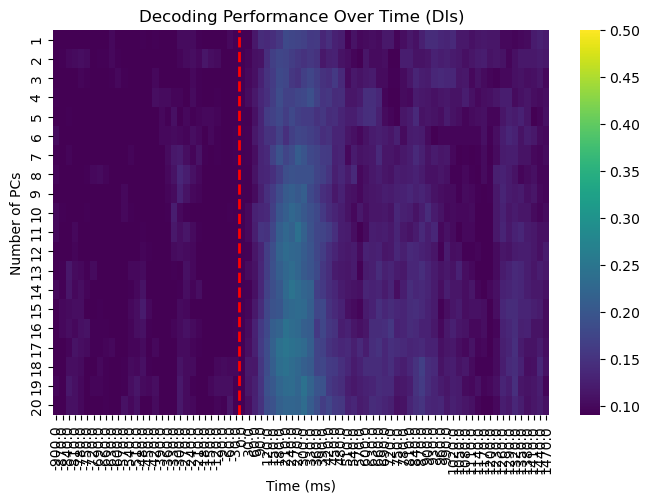

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    area="Dls", max_components=20, model="pca",
    idx_event="idx_sol_on", min_time=-1, max_time=1.5,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

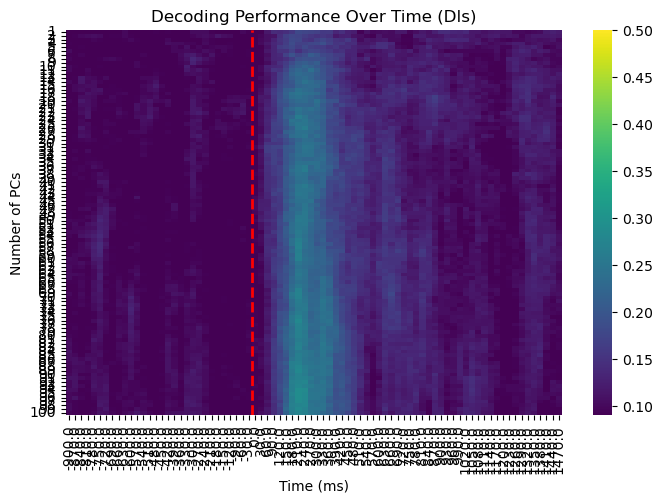

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    area="Dls", max_components=100, model="pca",
    idx_event="idx_sol_on", min_time=-1, max_time=1.5,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

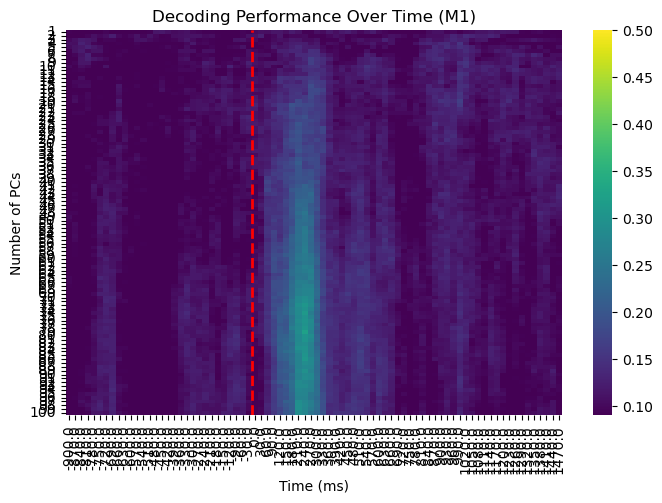

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    area="M1", max_components=100, model="pca",
    idx_event="idx_sol_on", min_time=-1, max_time=1.5,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

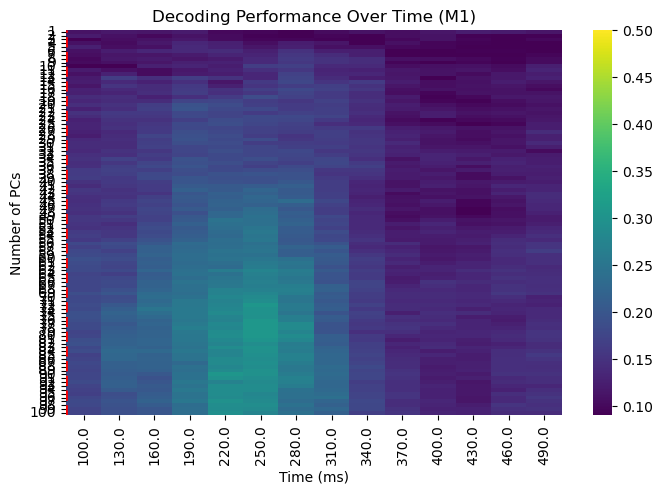

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    area="M1", max_components=100, model="pca",
    idx_event="idx_sol_on", min_time=0, max_time=0.5,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

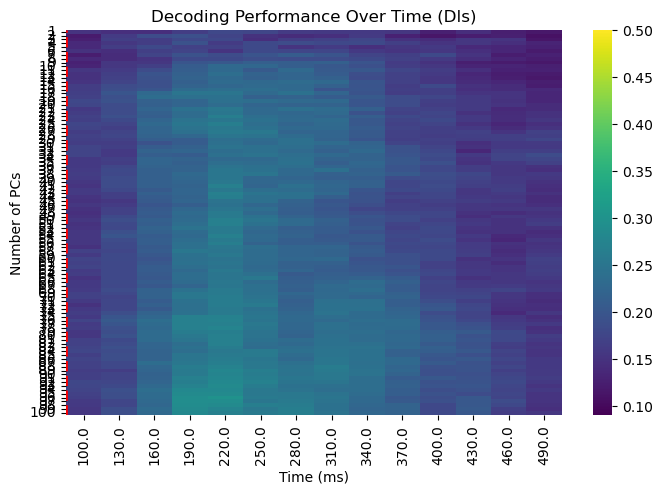

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    area="Dls", max_components=100, model="pca",
    idx_event="idx_sol_on", min_time=0, max_time=0.5,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

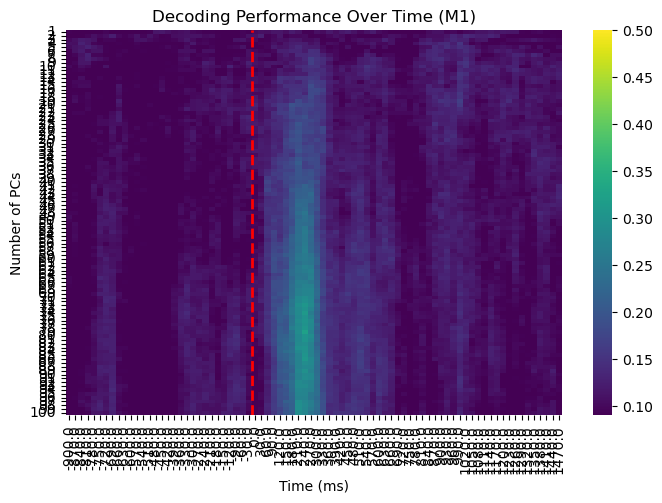

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    area="M1", max_components=100, model="pca",
    idx_event="idx_sol_on", min_time=-1, max_time=1.5,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

In [ ]:
# compare eigen vectors before perturbation, after perturbation, intertrials
# do pca on each and project the other one on it 
# get pca space for intertrials, for trials AFTER perturbation, for free period



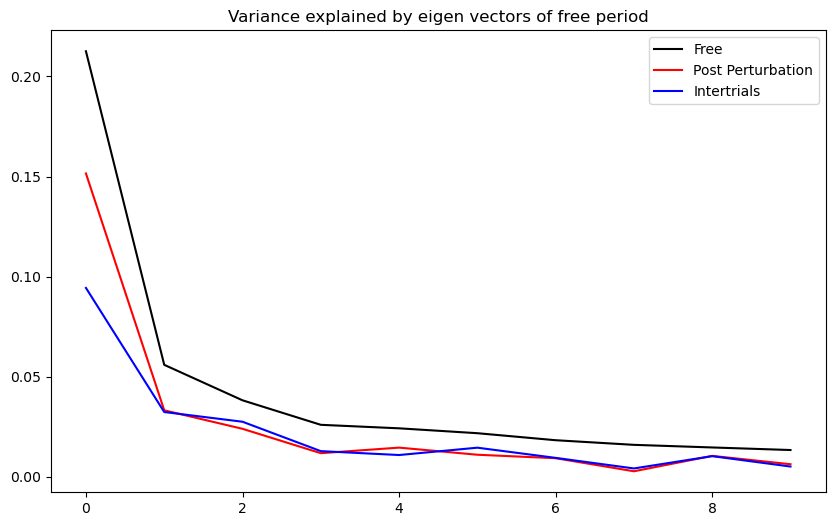

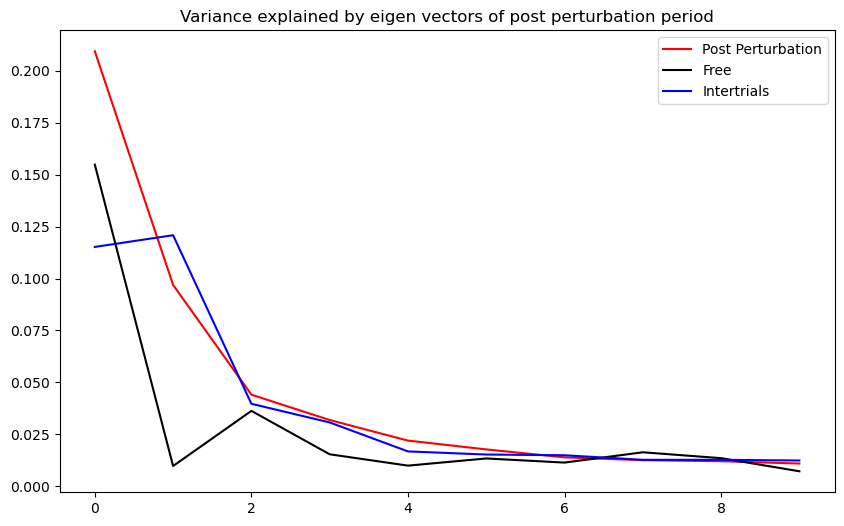

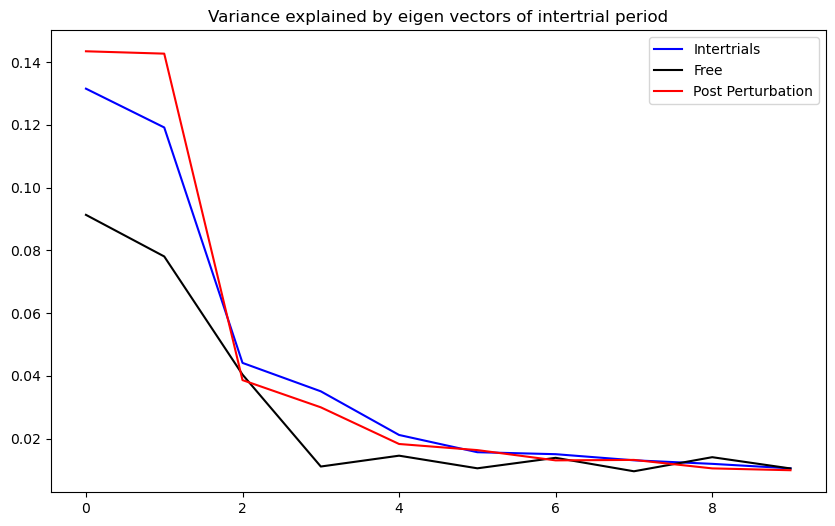

In [ ]:
from sklearn.decomposition import PCA
field = "Dls_rates"


n_components = 10
df_trials= pyal.select_trials(df_, "trial_name == 'trial'")
# df_trials= pyal.select_trials(df_, "idx_trial_start>89999")
df_trials = pyal.restrict_to_interval(df_trials, epoch_fun=Params.perturb_epoch)
df_intertrials= pyal.select_trials(df_, "trial_name == 'intertrial'")
df__ = df_.iloc[:-1].reset_index(drop=True)
df_free= pyal.select_trials(df__, "trial_name == 'free'")
rates_free = np.concatenate(df_free[field].values, axis=0)
rates_post_perturb = np.concatenate(df_trials[field].values, axis=0)
rates_intertrials = np.concatenate(df_intertrials[field].values, axis=0)

pca_free = PCA(n_components=n_components, svd_solver='full')
pca_post_perturb = PCA(n_components=n_components, svd_solver='full')
pca_intertrials = PCA(n_components=n_components, svd_solver='full')
pca_free.fit(rates_free)
pca_post_perturb.fit(rates_post_perturb)
pca_intertrials.fit(rates_intertrials)

free_projected_on_post_perturb = pca_post_perturb.transform(rates_free)
free_projected_on_intertrials = pca_intertrials.transform(rates_free)
intetrials_projected_on_post_perturb = pca_post_perturb.transform(rates_intertrials)
post_perturb_projected_on_free = pca_free.transform(rates_post_perturb)
post_perturb_projected_on_intertrials = pca_intertrials.transform(rates_post_perturb)
intetrials_projected_on_free = pca_free.transform(rates_intertrials)

# Explained variance for each PCA embedding
explained_variance_free = pca_free.explained_variance_ratio_
explained_variance_post_perturb = pca_post_perturb.explained_variance_ratio_
explained_variance_intertrials = pca_intertrials.explained_variance_ratio_

explained_variance_post_perturb_projected_on_free = np.var(post_perturb_projected_on_free, axis=0) / np.sum(np.var(rates_post_perturb, axis=0))
explained_variance_post_perturb_projected_on_intertrials = np.var(post_perturb_projected_on_intertrials, axis=0) / np.sum(np.var(rates_post_perturb, axis=0))
explained_variance_free_projected_on_post_perturb = np.var(free_projected_on_post_perturb, axis=0) / np.sum(np.var(rates_free, axis=0))
explained_variance_free_projected_on_intertrials = np.var(free_projected_on_intertrials, axis=0) / np.sum(np.var(rates_free, axis=0))
explained_variance_intertrials_projected_on_post_perturb = np.var(intetrials_projected_on_post_perturb, axis=0) / np.sum(np.var(rates_intertrials, axis=0))
explained_variance_intertrials_projected_on_free = np.var(intetrials_projected_on_free, axis=0) / np.sum(np.var(rates_intertrials, axis=0))


# Plot exlained variance for each PCA embedding
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_free, label='Free', color='black')
plt.plot(explained_variance_post_perturb_projected_on_free, label='Post Perturbation', color='red')
plt.plot(explained_variance_intertrials_projected_on_free, label='Intertrials', color='blue')
plt.legend()
plt.title('Variance explained by eigen vectors of free period')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(explained_variance_post_perturb, label='Post Perturbation', color='red')
plt.plot(explained_variance_free_projected_on_post_perturb, label='Free', color='black')
plt.plot(explained_variance_intertrials_projected_on_post_perturb, label='Intertrials', color='blue')
plt.legend()
plt.title('Variance explained by eigen vectors of post perturbation period')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(explained_variance_intertrials, label='Intertrials', color='blue')
plt.plot(explained_variance_free_projected_on_intertrials, label='Free', color='black')
plt.plot(explained_variance_post_perturb_projected_on_intertrials, label='Post Perturbation', color='red')
plt.legend()
plt.title('Variance explained by eigen vectors of intertrial period')
plt.show()




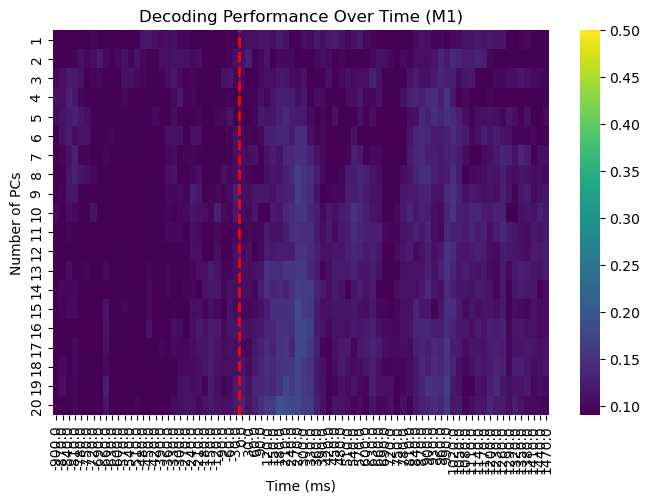

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window_per_component(
    ax, category="values_Sol_direction", df_list=[df_], 
    area="M1", max_components=20, model="pca",
    idx_event="idx_sol_on", min_time=-1, max_time=1.5,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

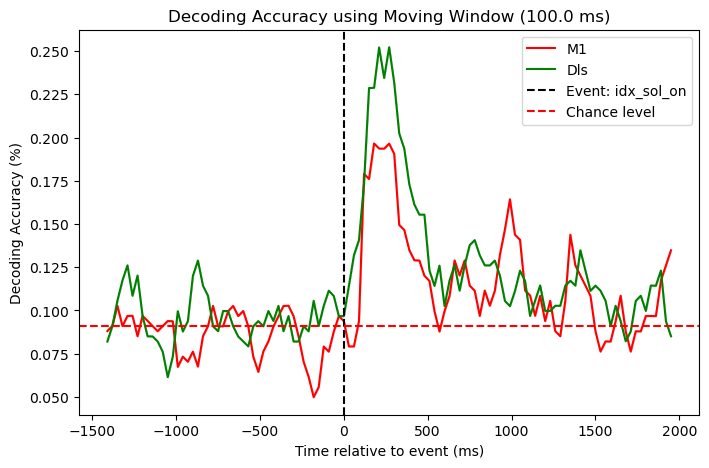

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.03, trial_conditions=[]
)

plt.show()

In [ ]:
df_gud

animal                session  trial_id trial_name  trial_length  \
0     M044  M044_2024_12_04_09_30        82      trial           401   
1     M044  M044_2024_12_04_09_30        84      trial           401   
2     M044  M044_2024_12_04_09_30        86      trial           401   
3     M044  M044_2024_12_04_09_30        88      trial           401   
4     M044  M044_2024_12_04_09_30        90      trial           401   
..     ...                    ...       ...        ...           ...   
488   M044  M044_2024_12_04_09_30      1058      trial           401   
489   M044  M044_2024_12_04_09_30      1060      trial           401   
490   M044  M044_2024_12_04_09_30      1062      trial           401   
491   M044  M044_2024_12_04_09_30      1064      trial           401   
492   M044  M044_2024_12_04_09_30      1066      trial           401   

     bin_size  idx_trial_start  idx_trial_end idx_CPI  \
0        0.03            30233          30366      []   
1        0.03            30399          30533      []   
2        0.03            30633          30766      []   
3        0.03            30933          31066      []   
4        0.03            31099          31233      []   
..        ...              ...            ...     ...   
488      0.03           158633         158766      []   
489      0.03           158999         159133      []   
490      0.03           159233         159366      []   
491      0.03           159466         159599      []   
492      0.03           159766         159899      []   

    values_before_camera_trigger  ... idx_session_timer  \
0                             []  ...                []   
1                             []  ...                []   
2                             []  ...                []   
3                             []  ...                []   
4                             []  ...                []   
..                           ...  ...               ...   
488                           []  ...                []   
489                           []  ...                []   
490                           []  ...                []   
491                           []  ...                []   
492                           []  ...                []   

                                         all_chan_best  \
0    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
1    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
2    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
3    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
4    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
..                                                 ...   
488  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
489  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
490  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
491  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
492  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   

                                        all_unit_guide  \
0    [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
1    [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
2    [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
3    [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
4    [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
..                                                 ...   
488  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
489  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
490  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
491  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
492  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   

                                           all_KSLabel  \
0    [good, mua, good, mua, good, good, good, good,...   
1    [good, mua, good, mua, good, good, good, good,...   
2    [good, mua, good, mua, good, good, good, good,...   
3    [good, mua, good, mua, good, good, good, good,...   
4    [good, mua, good, mua, good, good, good, good,...   
.. 

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=3, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=1.5,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

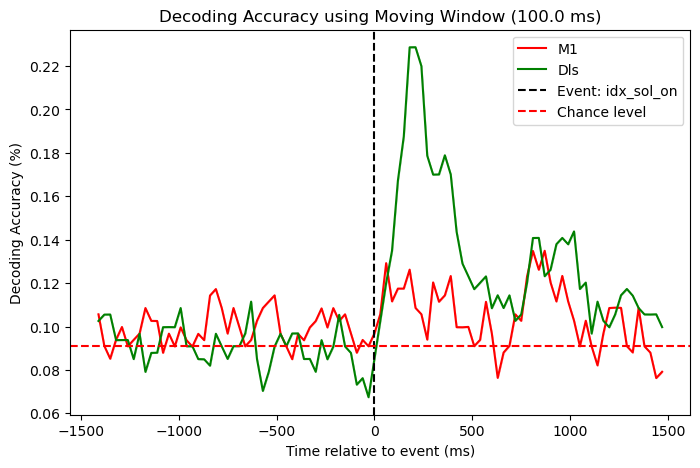

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_], 
    areas=["M1", "Dls"], n_components=3, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=1.5,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

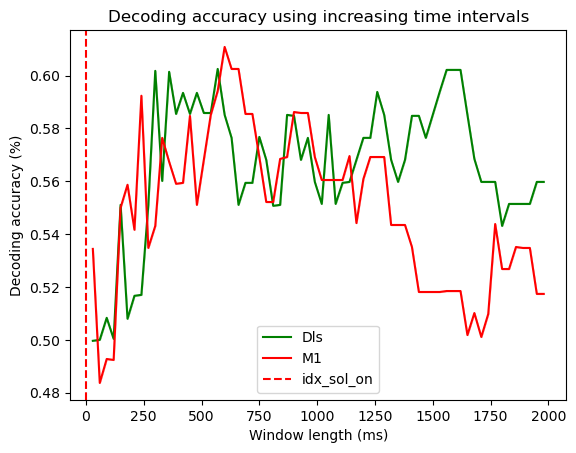

In [ ]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "sol_level_id", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 100"])


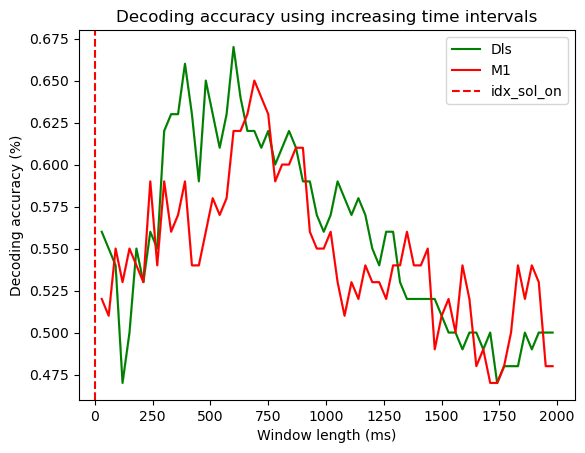

In [ ]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "sol_level_id", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 200"])


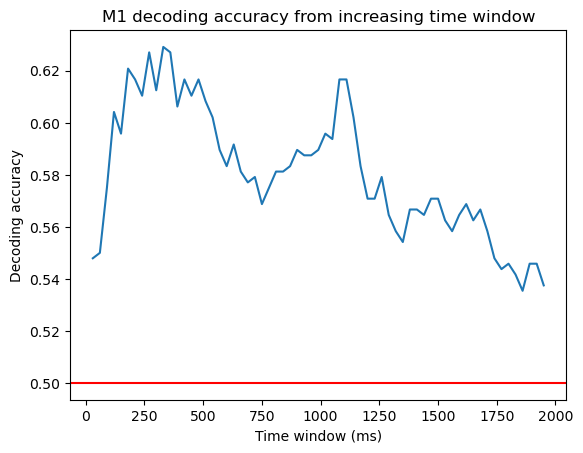

In [ ]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("M1 decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/2, color='r', linestyle='-')

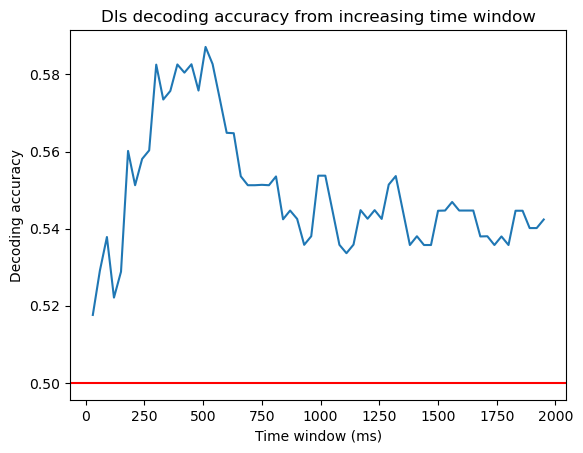

In [ ]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("Dls decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/2, color='r', linestyle='-')

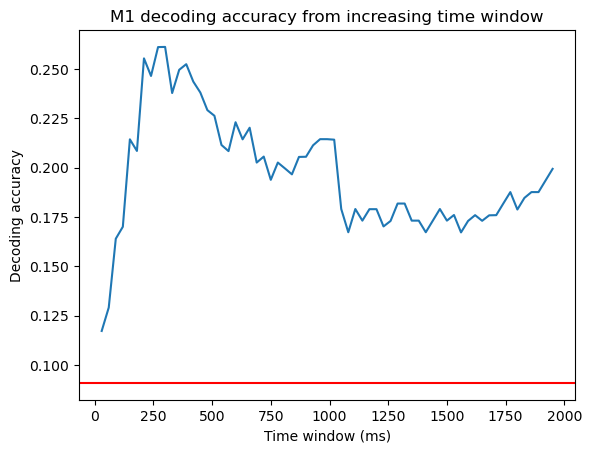

In [ ]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("M1 decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/11, color='r', linestyle='-')

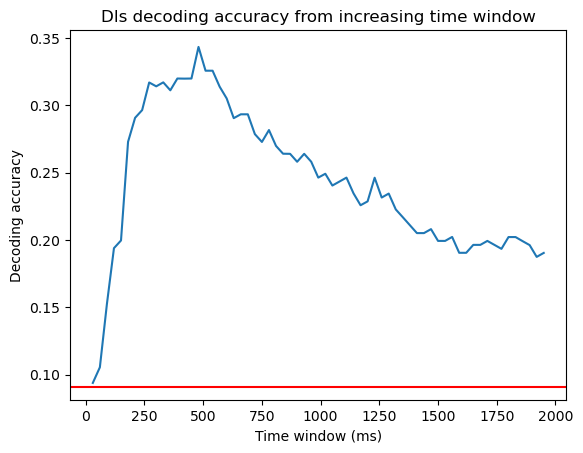

In [ ]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

within_results_comparison = np.array(within_results_comparison)
x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("Dls decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/11, color='r', linestyle='-')

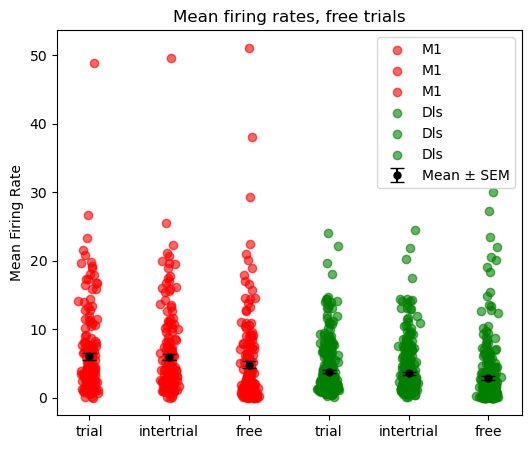

In [ ]:
from tools.viz import mean_firing as firing
areas = ["M1", "Dls"]
fig, ax = plt.subplots(figsize=(6, 5))
trial_types = ['trial', 'intertrial','free']
firing.compare_mean_firing(ax,df__,areas = areas,trial_types=trial_types)


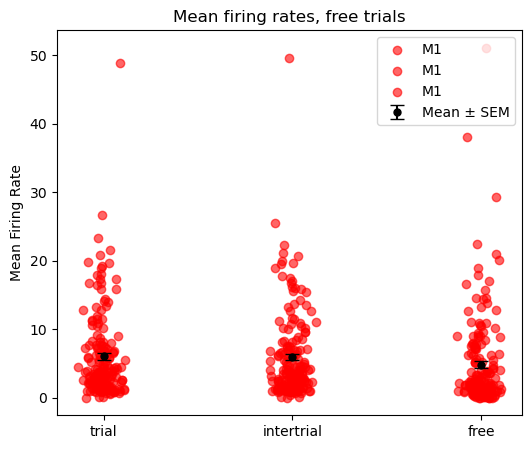

In [ ]:
from tools.viz import mean_firing as firing
areas = ["M1"]
fig, ax = plt.subplots(figsize=(6, 5))
trial_types = ['trial', 'intertrial','free']
firing.compare_mean_firing(ax,df__,areas = areas,trial_types=trial_types)

In [ ]:
fig=gs.figure
    
dfs=[]
axes=[]
category = "values_Sol_direction"
targets = np.unique(df[category])

df_ = pyal.restrict_to_interval(df,epoch_fun = epoch) if epoch is not None else session
for area in areas:
    for trial_type in trial_types:
        df__ = pyal.select_trials(df_, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df[area+'_rates'].values, axis=0) # rates contains the values of M1_rates in all trials concatenated, there are 239 trials, each with 15 timepoints and 87 units, so rates has size 239x15, 87

        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates) ## create PCA model fit to the rates matrix 
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca'); ## apply PCA model on the dataframe (each trial) for session 1, this will add a new column to the dataframe, for each trial there will be a matrix 15x10 corresponding to the 15 timepoints in the trial and the 10 PCA components
        ax = fig.add_subplot(gs[i], projection='3d',fc='None')
        axes.append(ax)
        for tar in targets: ## all trials in a session corresponding to one type of trial (a certain target) are averaged and plotted
            df____ = pyal.select_trials(df___, df_[category]==tar)
            ex = pyal.get_sig_by_trial(df____,'_pca')
            ex = np.mean(ex, axis=2)[:,:3]
            ax.plot(ex[:,0],ex[:,1],ex[:,2],lw=1)
            ax.view_init(60,-47)


titles=[r'Monkey K (unaligned)',r'Monkey L (unaligned)',
        r'Monkey K (aligned)',  r'Monkey L (aligned)']
labels = ['PC','PC','CC','CC']
for i, ax in enumerate(axes):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(f'{labels[i]}1', labelpad=-15, fontsize=9)
    ax.set_ylabel(f'{labels[i]}2', labelpad=-15, fontsize=9)
    ax.set_zlabel(f'{labels[i]}3', labelpad=-15, fontsize=9)
    ax.set_title(titles[i], y=.9, loc='center', fontsize= 9)

#======== add the arrow

ax = fig.add_subplot(gs[2], fc='None')
ax.arrow(0,0,1,0,length_includes_head=True, width=.005, head_width=.015,head_length=.1, ec=epoch_to_color(epoch1) if epoch1 is not None else epoch_to_color(epoch), fc=epoch_to_color(epoch1) if epoch1 is not None else epoch_to_color(epoch))
ax.set_ylim([-.1,.1])
ax.set_xlim([-.5,1.1])



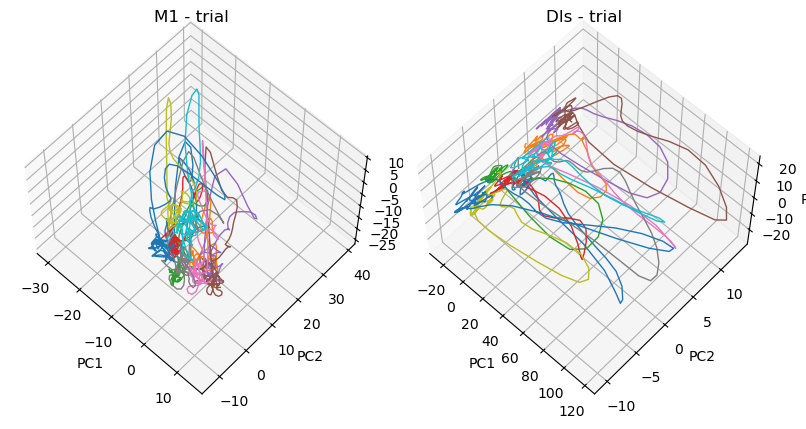

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df_gud

# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

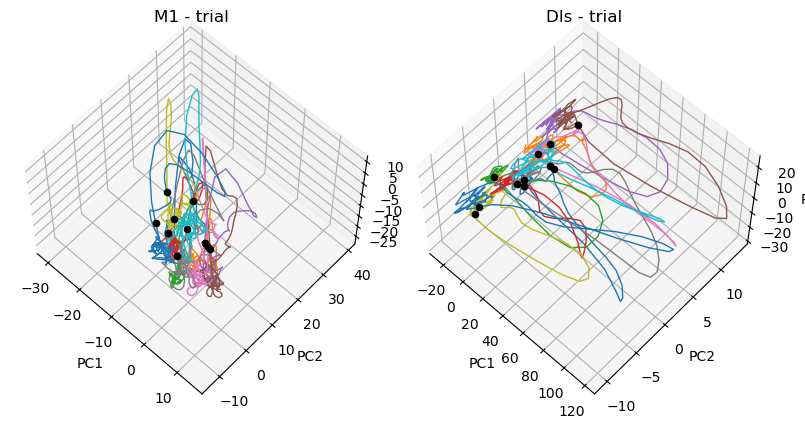

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

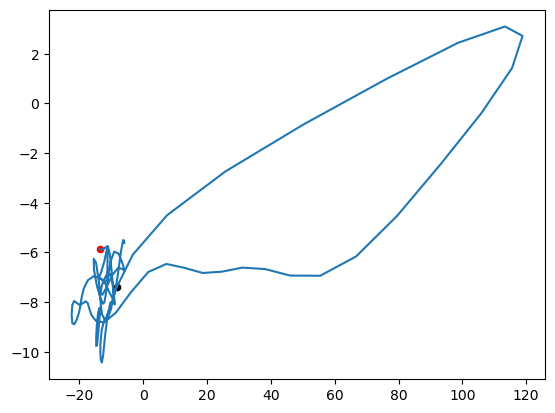

In [ ]:
plt.plot(ex[:, 0], ex[:, 1])
plt.scatter(ex[timepoint, 0], ex[timepoint, 1], 
                           color='k', s=20, marker='o')
plt.scatter(ex[0, 0], ex[0, 1], 
                           color='r', s=20, marker='o')

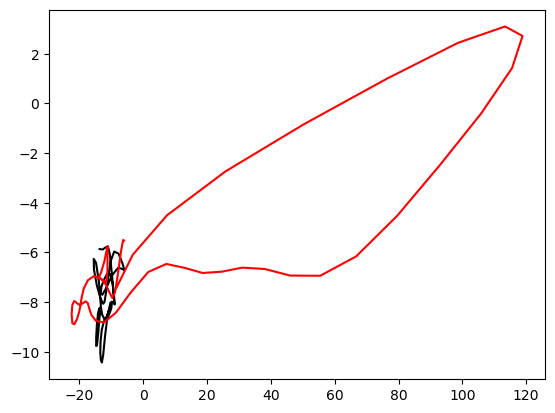

In [ ]:
plt.plot(ex[0:timepoint, 0], ex[0:timepoint, 1], color = 'k')
plt.plot(ex[timepoint:-1, 0], ex[timepoint:-1, 1], color = 'r')

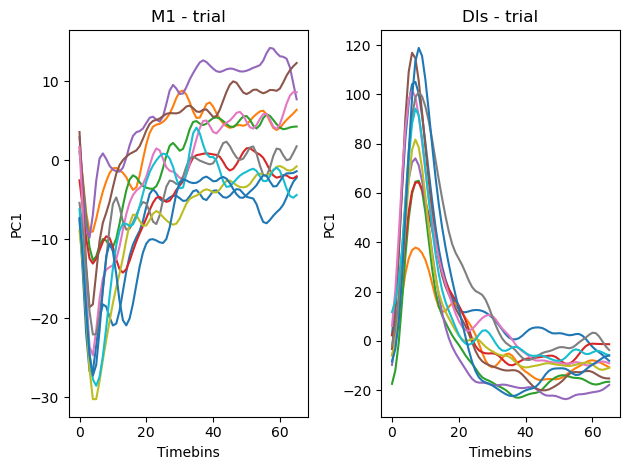

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[timepoint:-1, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

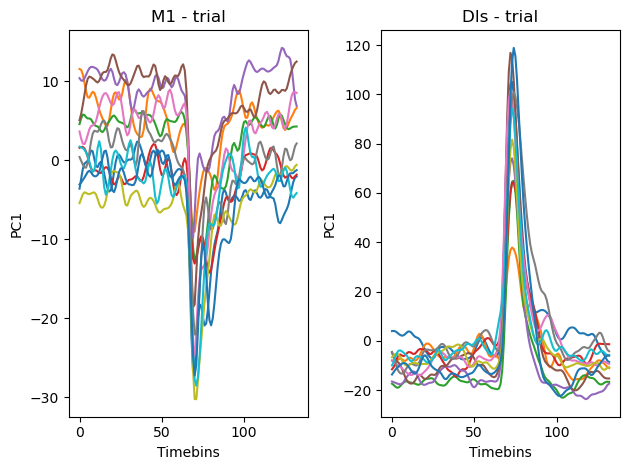

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[:, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

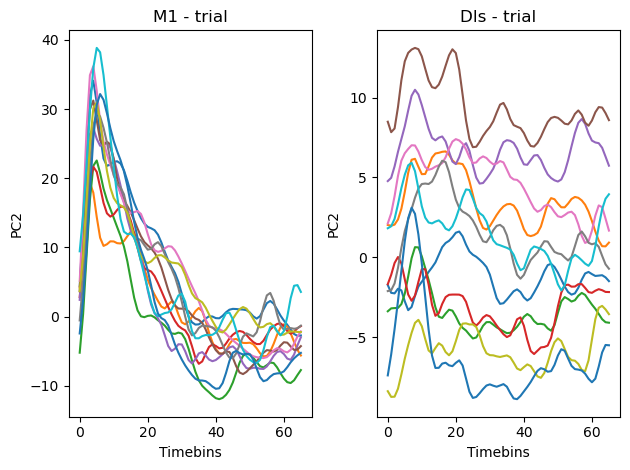

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[timepoint:-1, 1])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC2")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()


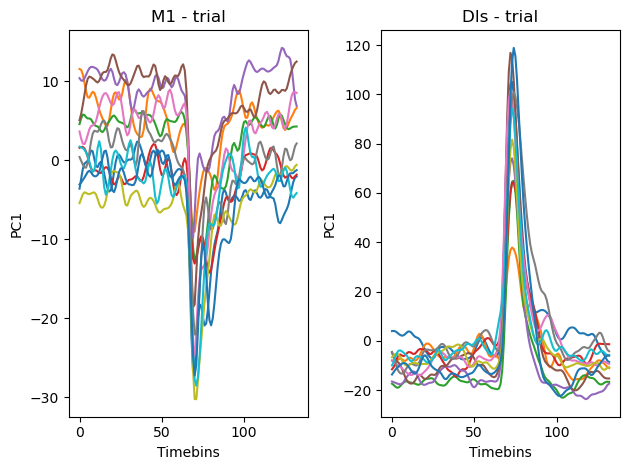

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
n_components = 3
dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[:, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()


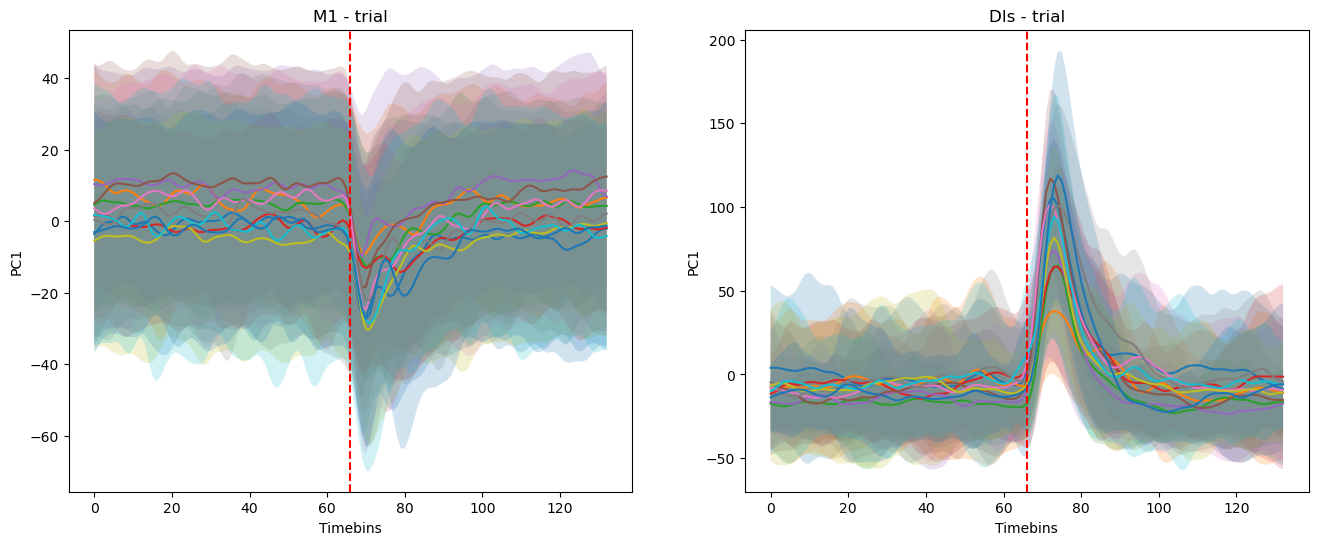

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from tools.viz import utilityTools as utility
from scipy.stats import sem
n_components = 3
dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)
        
        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]
        
        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            # print(ex.shape)
            # ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ex = ex[:, 0,:]
            time_axis = np.arange(ex.shape[0])
            utility.shaded_errorbar(
            ax,
            time_axis,
            ex,
            label=tar,
          
        )
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
        ax.set_xlabel("Timebins (30ms)")
            # ax.plot(ex[:, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()


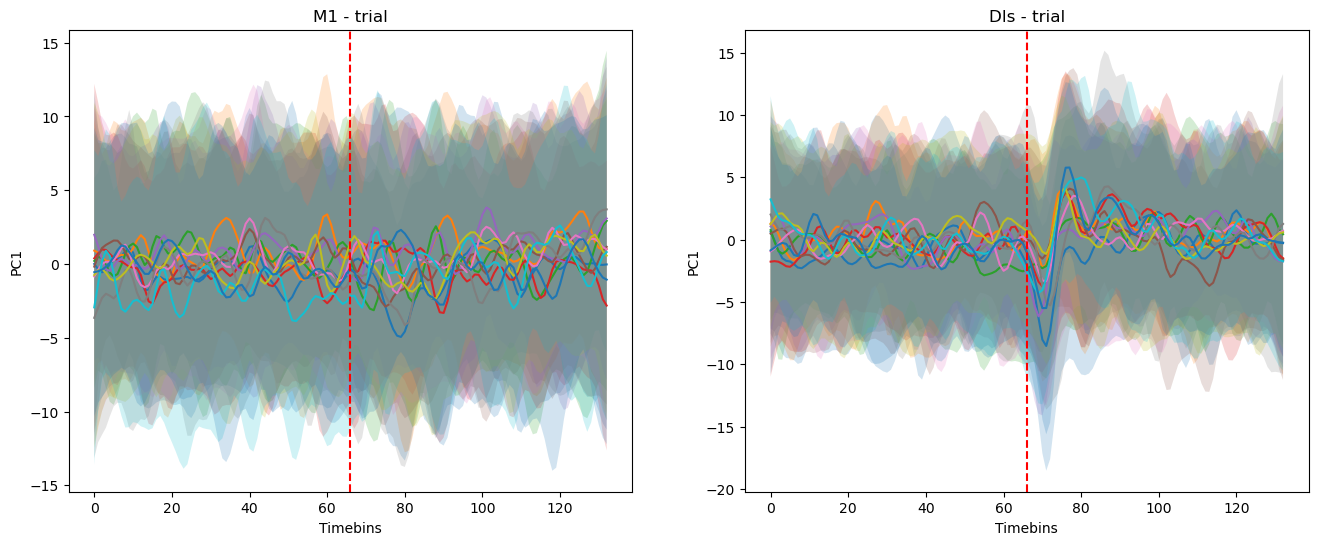

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from tools.viz import utilityTools as utility
from scipy.stats import sem
n_components = 30
dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)
        
        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]
        
        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            # print(ex.shape)
            # ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ex = ex[:, 29,:]
            time_axis = np.arange(ex.shape[0])
            utility.shaded_errorbar(
            ax,
            time_axis,
            ex,
            label=tar,
          
        )
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
        ax.set_xlabel("Timebins (30ms)")
            # ax.plot(ex[:, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()


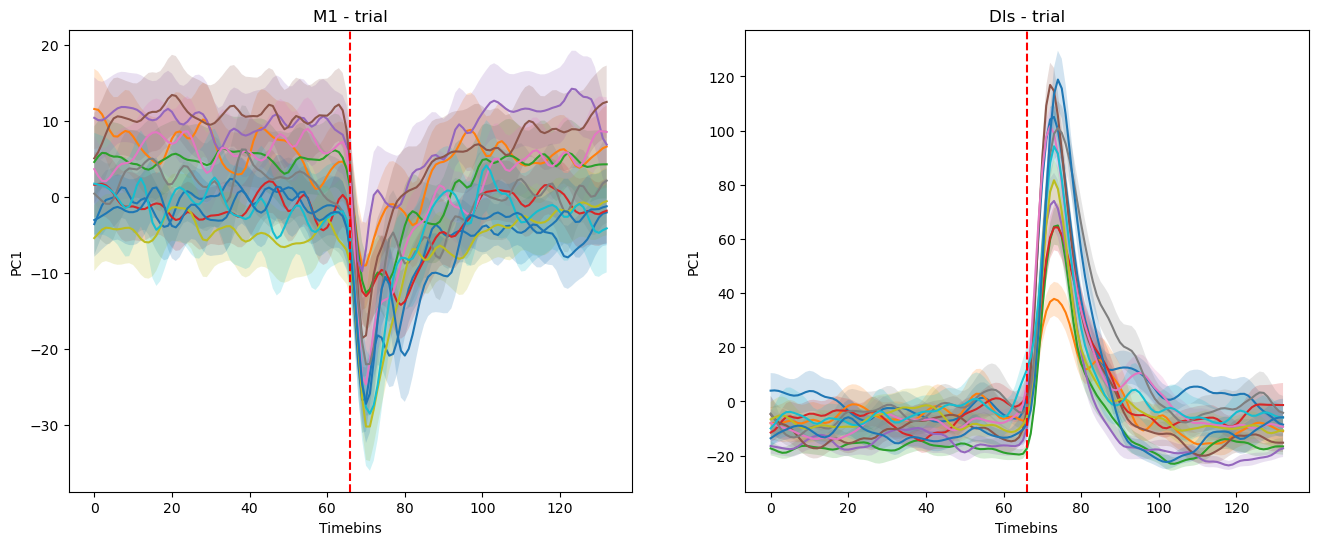

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from tools.viz import utilityTools as utility
from scipy.stats import sem
n_components = 3
dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)
        
        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]
        
        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            # print(ex.shape)
            # ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ex = ex[:, 0,:]
            time_axis = np.arange(ex.shape[0])
            utility.shaded_errorbar(
            ax,
            time_axis,
            ex,
            label=tar,
            errorStat = sem,
          
        )
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
        ax.set_xlabel("Timebins (30ms)")
            # ax.plot(ex[:, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()


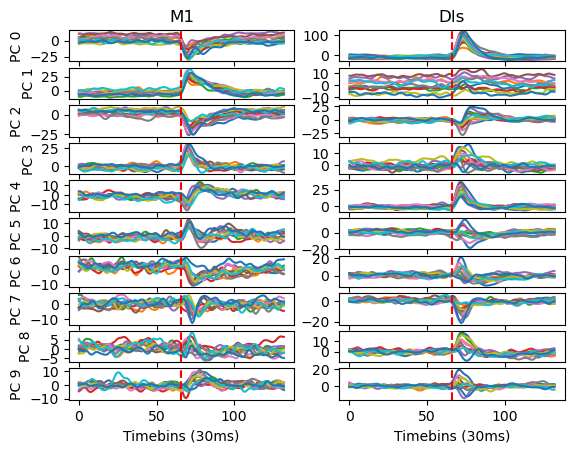

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None
n_components = 10
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

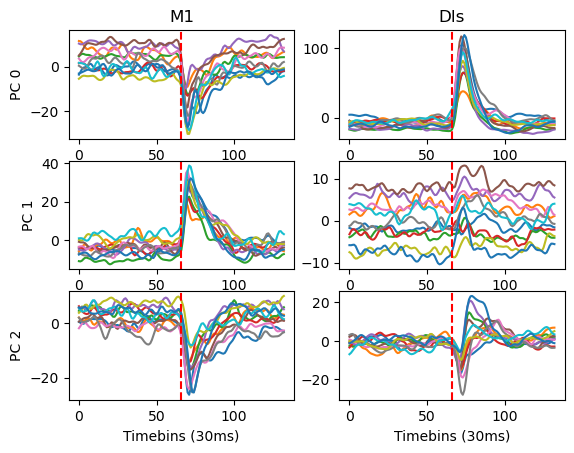

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None
n_components = 3
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

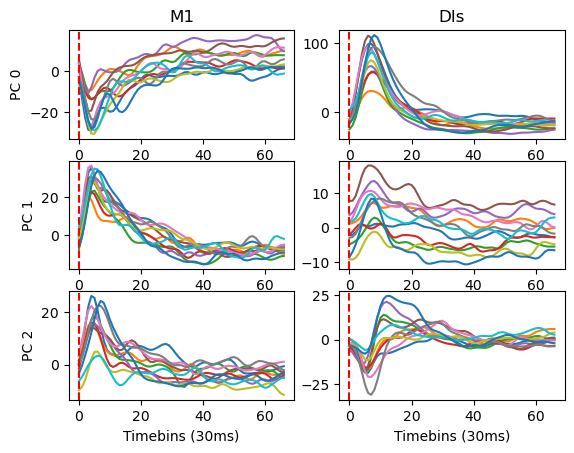

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch
n_components = 3
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

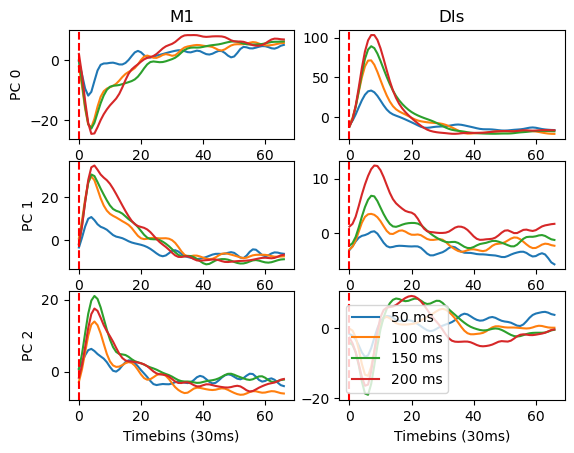

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_duration"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch
n_components = 3
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row],label=f"{tar} ms")
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
ax.legend()
plt.show()


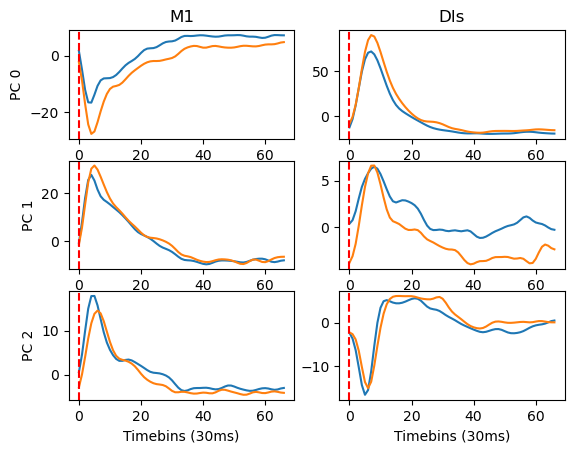

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "sol_level_id"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch
n_components = 3


df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
targets = np.unique(df__[category])
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None
n_components = 10
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

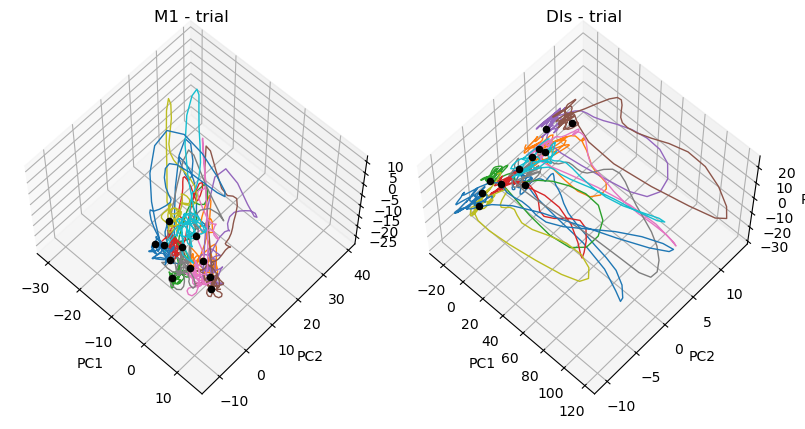

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = 0
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

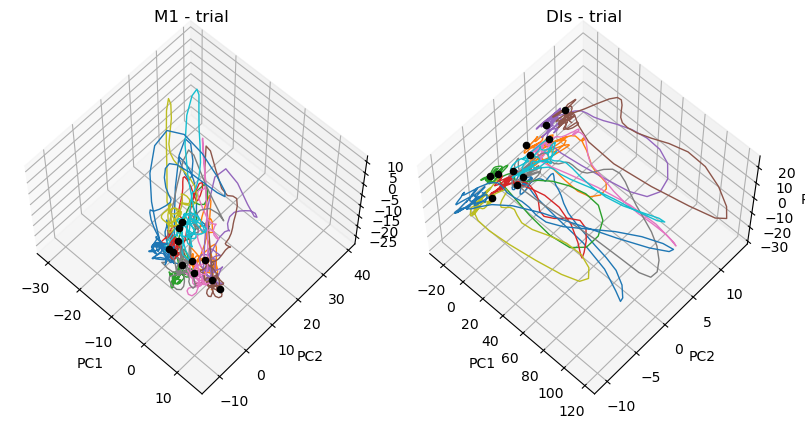

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = -1
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

In [ ]:
plt.plot()

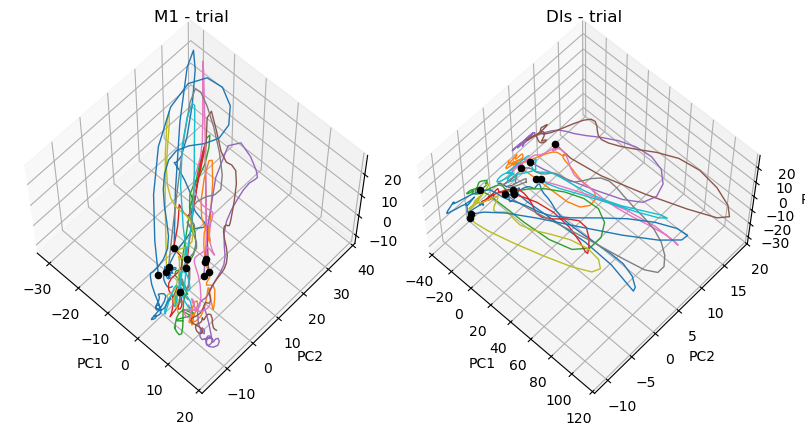

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

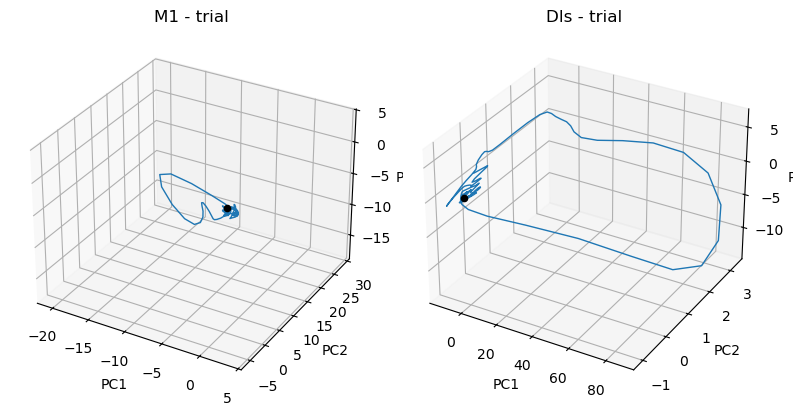

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = 0
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        
        ex = pyal.get_sig_by_trial(df___, '_pca')
        ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
        ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                        color='k', s=20, marker='o', label="Sol on")

        ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
        # ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

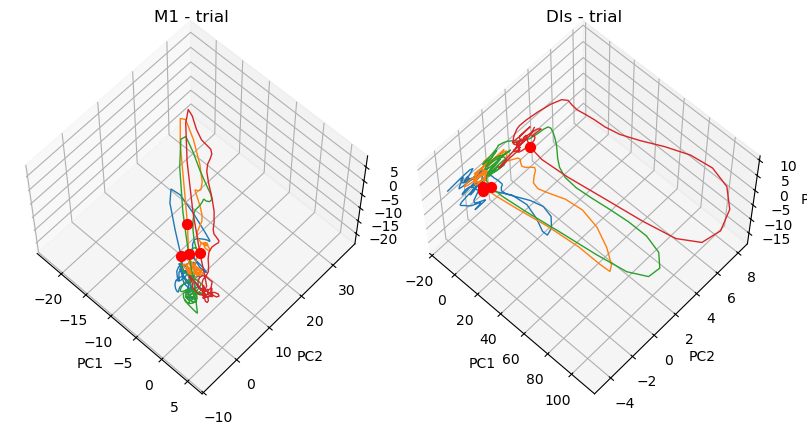

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_duration"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")
            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

In [ ]:
timepoint

0

ValueError: need at least one array to stack

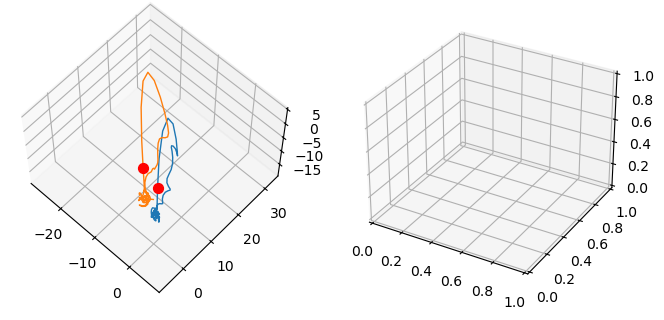

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "sol_level_id"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df__
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='r', s=50, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

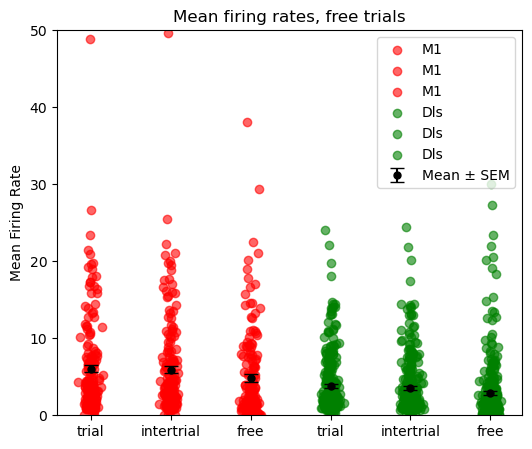

In [ ]:
areas = ["M1", "Dls"]
fig, ax = plt.subplots(figsize=(6, 5))

mean_values = []
std_errors = []
trial_types = ['trial', 'intertrial','free']
i = 0
for area in areas:
    # Concatenate all timepoints to get (timepoints * trials, neurons)
    for trial_type in trial_types:
        df___ = pyal.select_trials(df__, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df___[f"{area}_rates"].values, axis=0)
        
        # Compute mean firing rate per neuron
        mean_firing_rates = rates.mean(axis=0)

        # Compute overall mean and standard error
        mean_area = mean_firing_rates.mean()
        std_error = mean_firing_rates.std() / np.sqrt(len(mean_firing_rates))  # Standard Error of the Mean (SEM)

        mean_values.append(mean_area)
        std_errors.append(std_error)

        # Jitter x positions for scatter plot to avoid overlap
        jitter_x = np.random.normal(i, 0.05, size=len(mean_firing_rates))

        # Scatter plot of individual neuron firing rates
        ax.scatter(jitter_x, mean_firing_rates, alpha=0.6, label=f"{area}", color=getattr(params.colors, area, "k"))
        i+=1
# Overlay mean firing rate with error bars
ax.errorbar(range(len(areas)*len(trial_types)), mean_values, yerr=std_errors, fmt='o', capsize=5, markersize=5, color="k", label="Mean ± SEM")

# Labels and formatting
ax.set_xticks(range(len(areas)*len(trial_types)))
ax.set_xticklabels(trial_types*len(areas))
ax.set_ylabel("Mean Firing Rate")
ax.set_title("Mean firing rates, free trials")
ax.set_ylim([0, 50])
ax.legend()

plt.show()

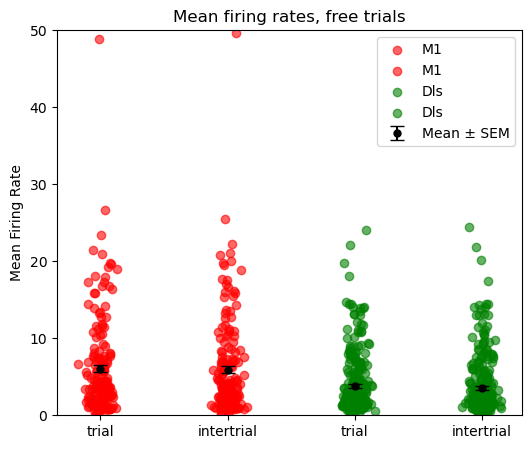

In [ ]:
areas = ["M1", "Dls"]
fig, ax = plt.subplots(figsize=(6, 5))

mean_values = []
std_errors = []
trial_types = ['trial', 'intertrial']
i = 0
for area in areas:
    # Concatenate all timepoints to get (timepoints * trials, neurons)
    for trial_type in trial_types:
        df___ = pyal.select_trials(df__, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df___[f"{area}_rates"].values, axis=0)
        
        # Compute mean firing rate per neuron
        mean_firing_rates = rates.mean(axis=0)

        # Compute overall mean and standard error
        mean_area = mean_firing_rates.mean()
        std_error = mean_firing_rates.std() / np.sqrt(len(mean_firing_rates))  # Standard Error of the Mean (SEM)

        mean_values.append(mean_area)
        std_errors.append(std_error)

        # Jitter x positions for scatter plot to avoid overlap
        jitter_x = np.random.normal(i, 0.05, size=len(mean_firing_rates))

        # Scatter plot of individual neuron firing rates
        ax.scatter(jitter_x, mean_firing_rates, alpha=0.6, label=f"{area}", color=getattr(params.colors, area, "k"))
        i+=1
# Overlay mean firing rate with error bars
ax.errorbar(range(len(areas)*len(trial_types)), mean_values, yerr=std_errors, fmt='o', capsize=5, markersize=5, color="k", label="Mean ± SEM")

# Labels and formatting
ax.set_xticks(range(len(areas)*len(trial_types)))
ax.set_xticklabels(trial_types*len(areas))
ax.set_ylabel("Mean Firing Rate")
ax.set_title("Mean firing rates, free trials")
ax.set_ylim([0, 50])
ax.legend()

plt.show()

In [ ]:

time_signals = [
        signal for signal in pyal.get_time_varying_fields(df) if "spikes" in signal
    ]

df_1 = df.copy()
for signal in time_signals:
    df_1 = pyal.remove_low_firing_neurons(df_1, signal, 1)

# Select trials
df_1 = pyal.select_trials(df_1, "trial_name == 'free'")  # Remove baseline

# Combine time bins
assert np.all(df_1.bin_size == 0.01), "bin size is not consistent!"
df_1 = pyal.combine_time_bins(df_1, int(Params.BIN_SIZE / 0.01))
print(f"Combined every {int(Params.BIN_SIZE / 0.01)} bins")

# Sqrt transformation for homoscedasticity
for signal in time_signals:
    df_1 = pyal.sqrt_transform_signal(df_1, signal)

# Transformation into firing rates
df_1 = pyal.add_firing_rates(df_1, "smooth", std=0.05)
for signal in time_signals:
    print(f"Resulting {signal} ephys data shape is (NxT): {df[signal][0].T.shape}")



/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (935, 60001)


In [ ]:
type(df_1['values_Sol_duration'][0])==np.ndarray

True

In [ ]:
df_1.columns

Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'all_spikes'],
      dtype='object')

In [ ]:
data_list = [df_]
areas = ["all"]
n_components = 474
epoch = None
model = "pca"

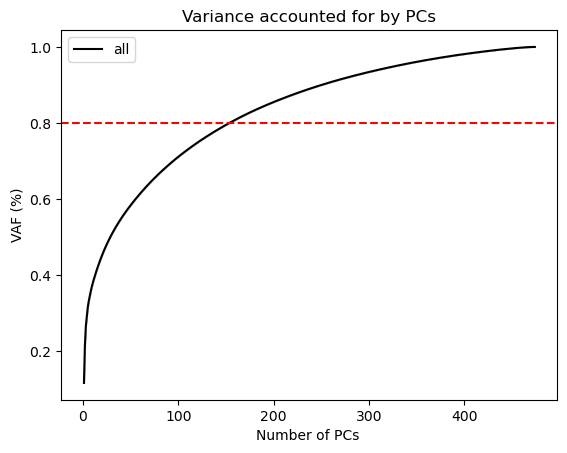

In [ ]:
# VAF for each area in areas list, averaged across sessions in data_list, with shaded errorbars.
fig, ax = plt.subplots()
dim.plot_VAF(ax = ax, data_list = data_list, areas = areas, n_components = n_components, epoch = epoch, model = model)


In [ ]:
areas = {"Dls": (0,300), 'M1': (300, 474)}

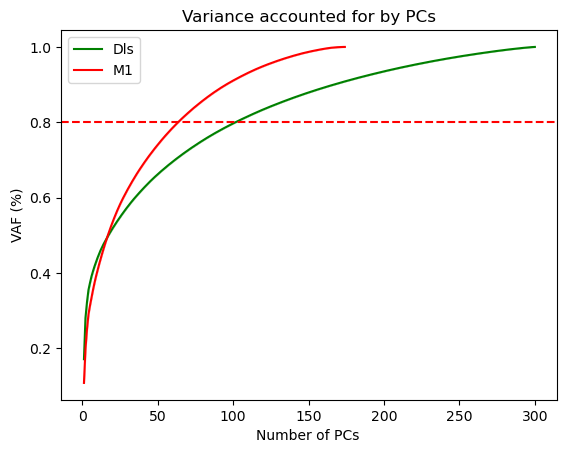

In [ ]:
# VAF for each area in areas list, averaged across sessions in data_list, with shaded errorbars.
fig, ax = plt.subplots()
dim.plot_VAF(ax = ax, data_list = data_list, areas = areas, n_components = n_components, epoch = epoch, model = model)

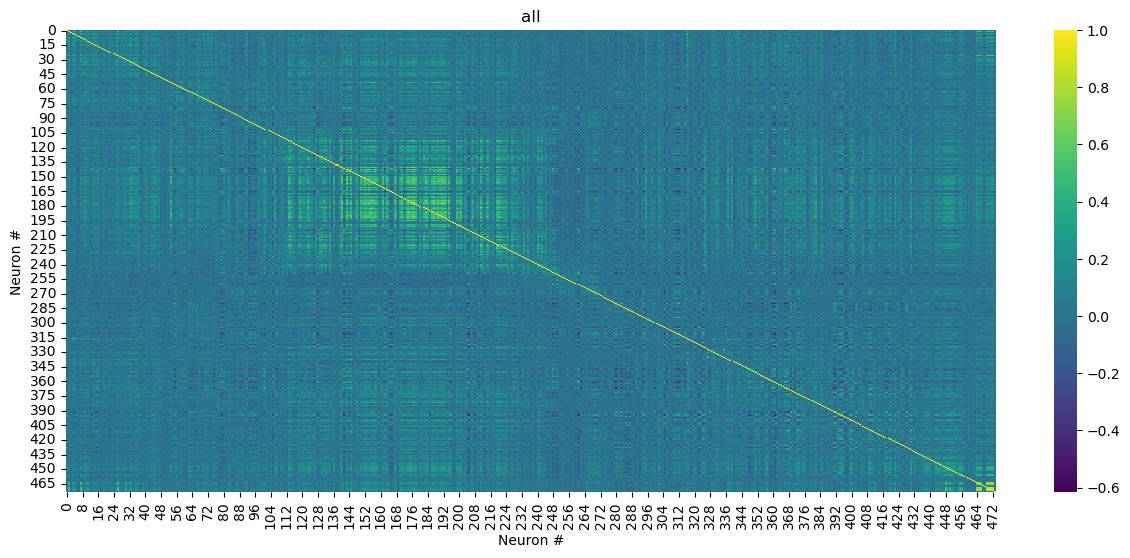

In [ ]:
# Pairwise correlation for one session for each area in areas list
fig, axes = plt.subplots(1, len(areas), figsize=(15, 6))
dim.plot_pairwise_corr(axes,df_, areas = areas, epoch = epoch)

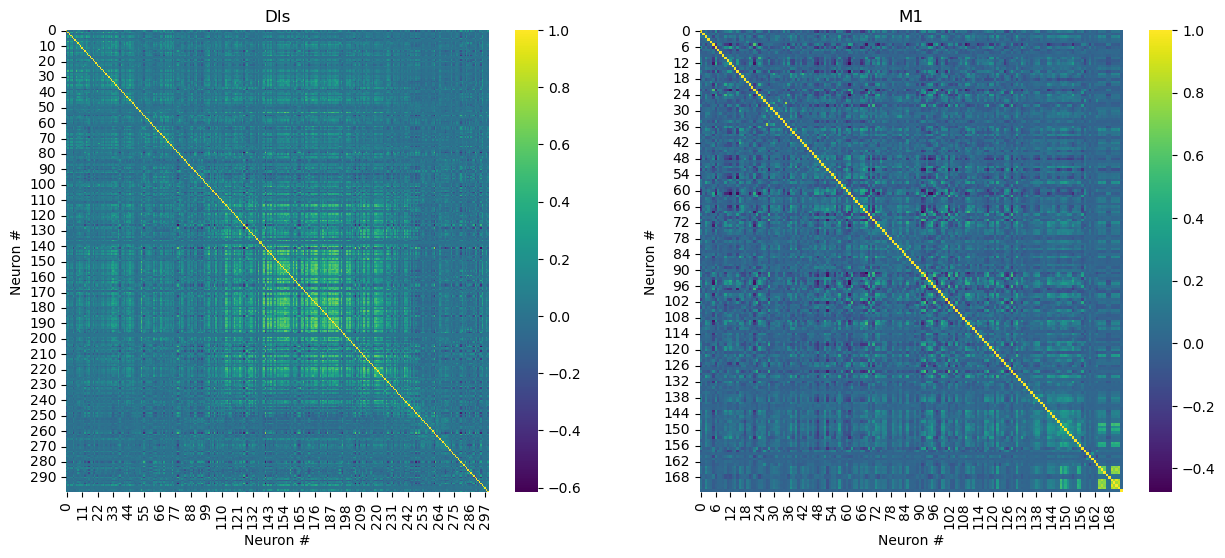

In [ ]:
# Pairwise correlation for one session for each area in areas list
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
dim.plot_pairwise_corr(axes,df_, areas = areas, epoch = epoch)

In [ ]:
# M1 + Dls combined
# check if classification comes from sth else: eg direction actually comes from intensity
# wach out period and initial period

In [ ]:
# generate moving window
# compute a certain metric
# plot the metric
# do that for each area on the same plot
